# 8.1 Архитектура Matplotlib

* Не использовать pylab

In [1]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

объект Figure: <class 'matplotlib.figure.Figure'>,
объект subplot: <class 'matplotlib.axes._subplots.AxesSubplot'>,
Иерархический доступ к объекту Subplot: <class 'matplotlib.axes._subplots.AxesSubplot'>



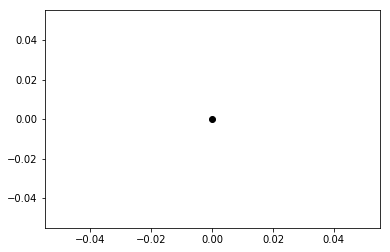

In [6]:
fig, subplot = plt.subplots()

print("объект Figure: %s,\nобъект subplot: %s,\nИерархический доступ к объекту Subplot: %s\n" % 
      (type(fig), type(subplot), type(fig.axes[0])))

subplot.plot([0], 'o', color = 'black')

In [7]:
import pandas as pd
from datetime import datetime

air_df = pd.read_csv('./data/air_quality.tar.gz', compression='gzip', sep=';', encoding='utf8')
air_df = air_df[air_df.iloc[:,0].notnull()]

# формируем столбец с таймстемпом
air_df['ts'] = (air_df.iloc[:,0]+ ' ' + air_df.iloc[:,1]).map(
    lambda x: datetime.strptime(x.replace('.',':'), "%d/%m/%Y %H:%M:%S")
)

air_df.head()

,air_quality.csv,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,ts
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


# 8.2 Простой график Matplotlib

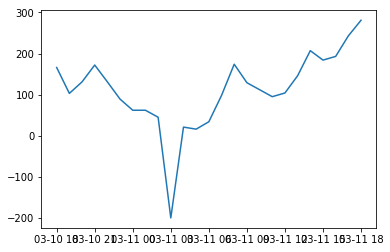

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters as rmc
%matplotlib inline

rmc()
TOP = 25

fig, subplot = plt.subplots()

x_ticks = air_df['ts'].values[:TOP]
y_ticks = air_df['NOx(GT)'].values[:TOP]
subplot.plot(x_ticks, y_ticks)
plt.show()

# 8.3 Сохранение и дальнейшая работа с графиком

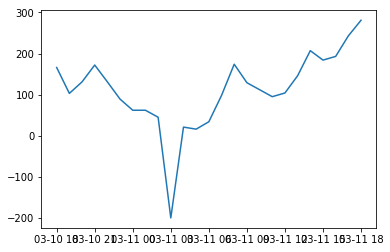

In [11]:
import numpy as np
import pickle
from pandas.plotting import register_matplotlib_converters as rmc

rmc()
TOP = 25

fig, subplot = plt.subplots()

x_ticks = air_df['ts'].values[:TOP]
y_ticks = air_df['NOx(GT)'].values[:TOP]
subplot.plot(x_ticks, y_ticks)

plt.savefig('air_quality.png')

![title](air_quality.png)

# 8.4 Добавление элементов на график

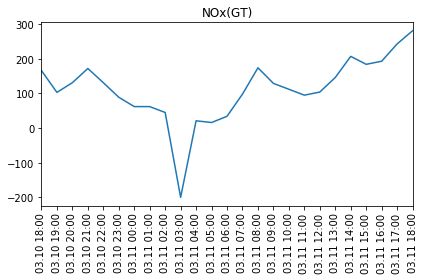

In [15]:
import numpy as np
import pickle
from pandas.plotting import register_matplotlib_converters as rmc

rmc()
TOP = 25

fig, subplot = plt.subplots()

x_ticks = air_df['ts'].values[:TOP]
y_ticks = air_df['NOx(GT)'].values[:TOP]
subplot.plot(x_ticks, y_ticks)

subplot.set_title('NOx(GT)')
x_labels = [pd.to_datetime(str(i)).strftime("%m.%d %H:%M") for i in air_df['ts'].values[:TOP]]
plt.xticks(x_ticks, rotation = 'vertical', labels = x_labels)

x_min = air_df['ts'].values[0]
x_max = air_df['ts'].values[TOP - 1]

subplot.set_xlim(left = x_min, right = x_max)

fig.tight_layout()

plt.show()

# 8.5 Простые графики в Matplotlib

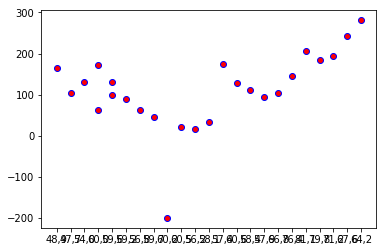

In [17]:
import numpy as np
from pandas.plotting import register_matplotlib_converters as rmc
%matplotlib inline

rmc()
TOP = 25
fig, subplot = plt.subplots()
x_values = air_df['RH'].values[:TOP]
y_values = air_df['NOx(GT)'].values[:TOP]

subplot.scatter(
    x = x_values, y = y_values,
    marker = 'o', c = 'r', edgecolor = 'b'
)

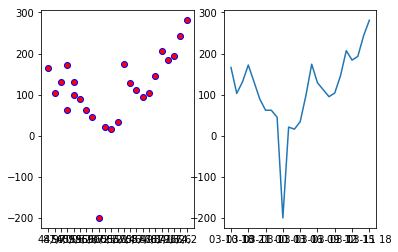

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters as rmc
%matplotlib inline

rmc()
TOP = 25

fig = plt.figure()

subplot1 = fig.add_subplot(121)
subplot1.scatter(
    x = air_df['RH'].values[:TOP], 
    y = air_df['NOx(GT)'].values[:TOP],
    marker = 'o', c = 'r', edgecolor = 'b'
)

subplot2 = fig.add_subplot(122)
subplot2.plot(
    air_df['ts'].values[:TOP],
    air_df['NOx(GT)'].values[:TOP]
)


# 8.6 Сложные графики в Matplotlib

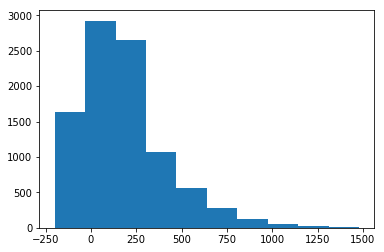

In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters as rmc

%matplotlib inline

rmc()
fig, subplot = plt.subplots()

subplot.hist(
    air_df['NOx(GT)'].values, bins = 10, histtype = 'bar',
    align = 'mid', orientation = 'vertical'
)

plt.show()

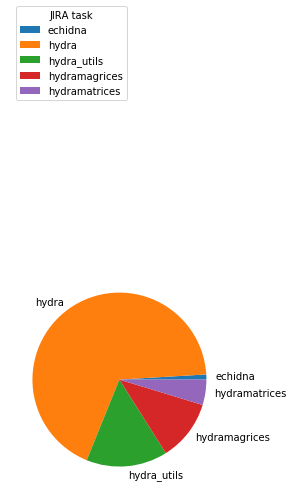

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
data = pd.read_csv("data/task.csv")
agg_df = data.groupby('Компонент')['Затрачено в часах'].sum()

fig, subplot = plt.subplots()

wedges, texts = subplot.pie(agg_df.values, explode = None, labels = agg_df.index.values)

subplot.legend(wedges, agg_df.index.values,
               title = "JIRA task",
               loc = "center left",
               bbox_to_anchor = {1.5, 0, 0.5, 1})
plt.show()

In [2]:
wedges

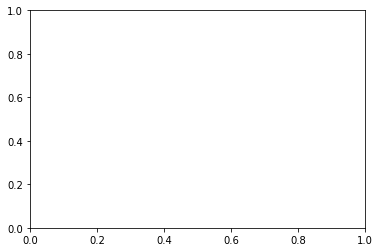

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

fig, sublplot = plt.subplots()

subplot.boxplot(air_df['PT08.S3(NOx)'].values, meanline = True)

plt.show()

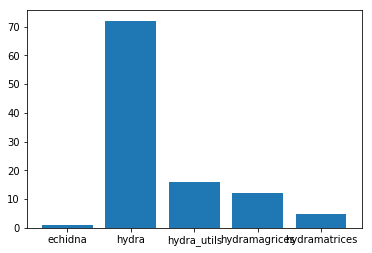

In [43]:
fig, subplot = plt.subplots()
subplot.bar(agg_df.index.values, agg_df.values)
plt.show()

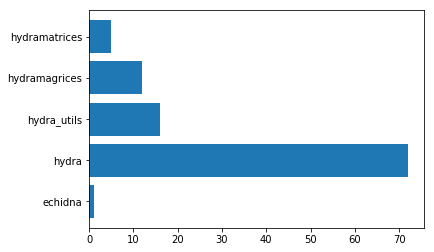

In [44]:
fig, subplot = plt.subplots()
subplot.barh(agg_df.index.values, agg_df.values)
plt.show()

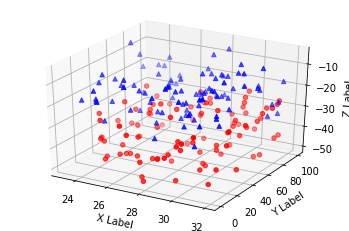

In [45]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# фиксируем рандом
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

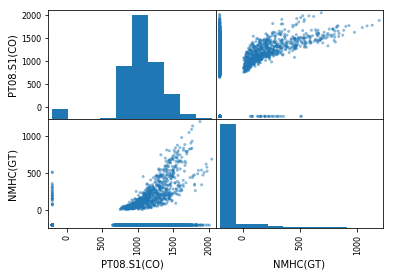

In [46]:
from pandas.plotting import scatter_matrix

scatter_matrix(air_df[['PT08.S1(CO)','NMHC(GT)']])
plt.show()